In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import model_selection

In [2]:
# Load the file
df = pd.read_csv(r"C:\Users\theaa\Downloads\final_data18k.csv")
print(df.head(5))

                                             Comment  label
0  opinion body guard biggest lower imagine failu...      1
1              social medium guy can stay away minor      1
2  wait people want b like u ahahah yea want b li...      1
3                        ll ll ll hid behind mate ll      1
4                                           fn loose      1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18580 entries, 0 to 18579
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  18572 non-null  object
 1   label    18580 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 290.4+ KB


In [4]:
sum(df['label'] == 0)

7534

In [5]:
sum(df['label'] == 1)

11046

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Drop rows with missing comments
df = df.dropna(subset=['Comment'])

# Define features and target
X = df['Comment']
y = df['label']

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

In [71]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [72]:
# Confirm sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13000, 5000), (5572, 5000), (13000,), (5572,))

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
# Predict the labels for the test set
y_pred_logistic = logistic_model.predict(X_test)

In [75]:
# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.8544508255563532

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82      2221
           1       0.89      0.86      0.88      3351

    accuracy                           0.85      5572
   macro avg       0.85      0.85      0.85      5572
weighted avg       0.86      0.85      0.86      5572



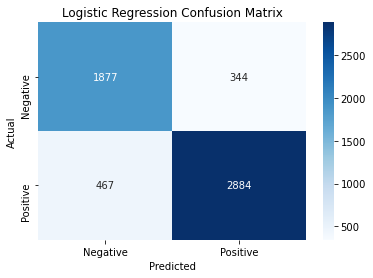

In [76]:
# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8454773869346733
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2221
           1       0.89      0.85      0.87      3351

    accuracy                           0.85      5572
   macro avg       0.84      0.84      0.84      5572
weighted avg       0.85      0.85      0.85      5572



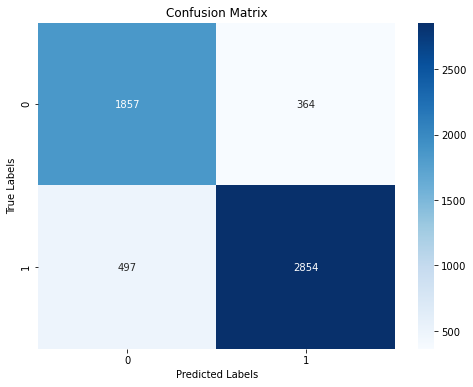

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [80]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [81]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8076094759511845
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      2221
           1       0.81      0.89      0.85      3351

    accuracy                           0.81      5572
   macro avg       0.81      0.79      0.79      5572
weighted avg       0.81      0.81      0.80      5572



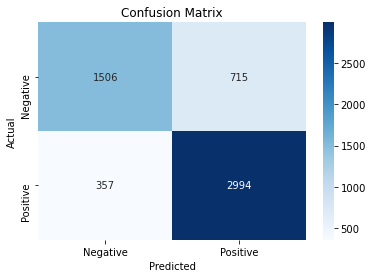

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Support Vector Machine

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Generate classification report
svm_report = classification_report(y_test, y_pred_svm)

# Print results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print("SVM Classification Report:")
print(svm_report)

SVM Accuracy: 85.12%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2221
           1       0.89      0.85      0.87      3351

    accuracy                           0.85      5572
   macro avg       0.84      0.85      0.85      5572
weighted avg       0.85      0.85      0.85      5572



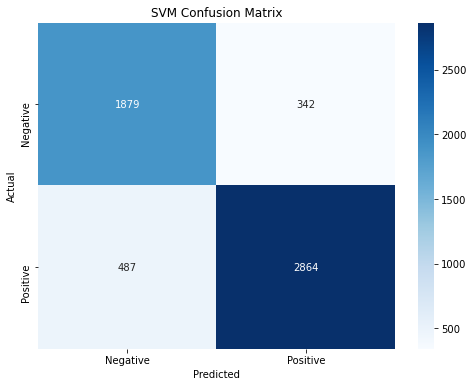

In [84]:
# Generate confusion matrix
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()